In [1]:
import pandas as pd
import joblib
#import pygmt
import numpy as np
from geojson import Point, Feature
from turfpy import measurement
from matplotlib.lines import Line2D
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os
import geopandas as gpd
from scipy.interpolate import griddata
import time

print("Imports...")
import pickle
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import time

# Make numpy values easier to read.
#np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import  Dense,  Dropout, Activation, Flatten
from tensorflow.keras.layers import  BatchNormalization, Input, GaussianNoise, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler as LRS
#import SGDRScheduler as sg
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import  sys
import  math
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
from scipy.interpolate import griddata
import xarray as xr


Imports...


2025-06-12 17:25:08.061112: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 17:25:08.078442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749741908.091853 2200917 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749741908.096493 2200917 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749741908.108179 2200917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
ini = time.time()

In [3]:
period = 1

In [4]:
event = "prueba"
magnitude_event = 7.0
latitude_event = 63.86241607923315
longitude_event = -20.41723877793937
depth_event = 11.4 

In [10]:
event = "prueba"
magnitude_event = 6.4
latitude_event =  63.893756
longitude_event = -21.168676
depth_event =  4.4

In [ ]:
model = tf.keras.models.load_model('/gpfs/projects/bsc21/bsc021395/MLESmap_Iceland/CompleteDatabase/ModelsCompleteDatabase/ModelsNN/20250612_Model_Iceland_3layers_8Feat_pSA_1_Batch100_Epoch15.h5')
scaler_filename_X = "/gpfs/projects/bsc21/bsc021395/MLESmap_Iceland/CompleteDatabase/ModelsCompleteDatabase/ModelsNN/scaler_X_1s.save"
scaler_filename_y = "/gpfs/projects/bsc21/bsc021395/MLESmap_Iceland/CompleteDatabase/ModelsCompleteDatabase/ModelsNN/scaler_y_1s.save"

scaler_X = joblib.load(scaler_filename_X) 
scaler_y = joblib.load(scaler_filename_y) 

2025-06-12 17:26:00.576681: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
latMax = 64.5
latMin = 63.5
lonMax = -20
lonMin = -23

rang_lat = float(latMax-latMin)/40
rang_lon = float(lonMax-lonMin)/40
dfStations = pd.DataFrame()

sitesLat = np.arange(latMin, latMax, rang_lat)
sitesLon = np.arange(lonMin, lonMax, rang_lon)

vecStations = np.array(np.meshgrid(sitesLat,sitesLon)).T.reshape(-1,2)
dfStations['Site_Lat'] = vecStations[:,0]
dfStations['Site_Lon'] = vecStations[:,1]

In [ ]:
azim1 = np.zeros(len(vecStations))
euclDist = np.zeros(len(vecStations))
for rj in np.arange(len(vecStations)):
    start1 = Feature(geometry=Point((longitude_event, latitude_event))) #Lat-Lon Earthquake
    end1 = Feature(geometry=Point((dfStations['Site_Lon'].iloc[rj], dfStations['Site_Lat'].iloc[rj]))) #Lat-Lon Station
    d1 = measurement.distance(start1,end1,'km')
    azim1[rj] = measurement.bearing(start1,end1) #print(d1/1000)
    euclDist[rj] =  np.sqrt((d1)**2 + (depth_event)**2)
    
df_InputData_CS_sites = pd.DataFrame()
df_InputData_CS_sites["Site_Lat"] = dfStations["Site_Lat"].values
df_InputData_CS_sites["Site_Lon"] = dfStations["Site_Lon"].values
df_InputData_CS_sites["Magnitude"] = magnitude_event*np.ones(len(vecStations))
df_InputData_CS_sites["Hypocenter_Lat"] = latitude_event*np.ones(len(vecStations))
df_InputData_CS_sites["Hypocenter_Lon"] = longitude_event*np.ones(len(vecStations))
df_InputData_CS_sites["Hypocenter_Depth"] = depth_event*np.ones(len(vecStations))
df_InputData_CS_sites["Haversine_distance"] = euclDist
df_InputData_CS_sites["Azimuth"] = azim1
df_InputData_CS_sites["Intensity Value "+str(period)+"s"] = 0
df_InputData_CS_sites["y_pred"] = 0
print(df_InputData_CS_sites)
feature_cols = ["Site_Lat", "Site_Lon","Magnitude","Hypocenter_Lat","Hypocenter_Lon","Hypocenter_Depth","Haversine_distance","Azimuth"]

      Site_Lat  Site_Lon  Magnitude  Hypocenter_Lat  Hypocenter_Lon  \
0       63.500   -23.000        7.0       63.862416      -20.417239   
1       63.500   -22.925        7.0       63.862416      -20.417239   
2       63.500   -22.850        7.0       63.862416      -20.417239   
3       63.500   -22.775        7.0       63.862416      -20.417239   
4       63.500   -22.700        7.0       63.862416      -20.417239   
...        ...       ...        ...             ...             ...   
1595    64.475   -20.375        7.0       63.862416      -20.417239   
1596    64.475   -20.300        7.0       63.862416      -20.417239   
1597    64.475   -20.225        7.0       63.862416      -20.417239   
1598    64.475   -20.150        7.0       63.862416      -20.417239   
1599    64.475   -20.075        7.0       63.862416      -20.417239   

      Hypocenter_Depth  Haversine_distance     Azimuth  Intensity Value 1s  \
0                 11.4          134.029902 -106.401737               

In [25]:
scaler_X.clip = True
X_test_minmax = scaler_X.transform(df_InputData_CS_sites[feature_cols])
X_test_minmax

/gpfs/projects/bsc21/bsc021395/CONDA/venvMLES/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[5.51727671e-04, 0.00000000e+00, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 2.04409286e-01],
       [5.51727671e-04, 0.00000000e+00, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 2.02950013e-01],
       [5.51727671e-04, 0.00000000e+00, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 2.01414854e-01],
       ...,
       [9.61775670e-01, 6.99406171e-01, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 5.21375604e-01],
       [9.61775670e-01, 7.20132849e-01, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 5.29550202e-01],
       [9.61775670e-01, 7.40859527e-01, 9.09090909e-01, ...,
        7.97366496e-01, 1.00000000e+00, 5.37564830e-01]])

In [26]:
inferences = model.predict(X_test_minmax)
print('inferences',inferences)
#print("feature_importance", model.feature_importances_)
y_pred = scaler_y.inverse_transform(inferences.reshape(-1,1))
df_InputData_CS_sites['y_pred'] = y_pred
print(y_pred)
df_event = df_InputData_CS_sites
df_event

 1/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
inferences [[0.45928824]
 [0.45940804]
 [0.45953512]
 ...
 [0.61785614]
 [0.6150244 ]
 [0.6121748 ]]
[[-2.090356 ]
 [-2.0895178]
 [-2.088629 ]
 ...
 [-0.9810061]
 [-1.0008173]
 [-1.020753 ]]


,Site_Lat,Site_Lon,Magnitude,Hypocenter_Lat,Hypocenter_Lon,Hypocenter_Depth,Haversine_distance,Azimuth,Intensity Value 1s,y_pred
0,63.500,-23.000,7.0,63.862416,-20.417239,11.4,134.029902,-106.401737,0,-2.090356
1,63.500,-22.925,7.0,63.862416,-20.417239,11.4,130.523428,-106.927046,0,-2.089518
2,63.500,-22.850,7.0,63.862416,-20.417239,11.4,127.027699,-107.479672,0,-2.088629
3,63.500,-22.775,7.0,63.862416,-20.417239,11.4,123.543635,-108.061865,0,-2.087698
4,63.500,-22.700,7.0,63.862416,-20.417239,11.4,120.072254,-108.676116,0,-2.098885
...,...,...,...,...,...,...,...,...,...,...
1595,64.475,-20.375,7.0,63.862416,-20.417239,11.4,69.094005,1.701877,0,-0.946177
1596,64.475,-20.300,7.0,63.862416,-20.417239,11.4,69.296862,4.714157,0,-0.962201
1597,64.475,-20.225,7.0,63.862416,-20.417239,11.4,69.688834,7.699694,0,-0.981006
1598,64.475,-20.150,7.0,63.862416,-20.417239,11.4,70.266756,10.642383,0,-1.000817


In [ ]:
inferences = model.predict(X_test_minmax)
print('inferences',inferences)
y_pred = scaler_y.inverse_transform(inferences.reshape(-1,1))
df_InputData_CS_sites['y_pred'] = y_pred
df_event = df_InputData_CS_sites


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
inferences [[0.45928824]
 [0.45940804]
 [0.45953512]
 ...
 [0.61785614]
 [0.6150244 ]
 [0.6121748 ]]


In [28]:
fin_inf = time.time()

TIME_INTERVAL_INFERENCIA = fin_inf-ini
TIME_INTERVAL_INFERENCIA

357.95333766937256

In [29]:
vecStations = pd.DataFrame(vecStations, columns=["Site_Lat", "Site_Lon"])

/gpfs/projects/bsc21/bsc021395/CONDA/venvMLES/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)


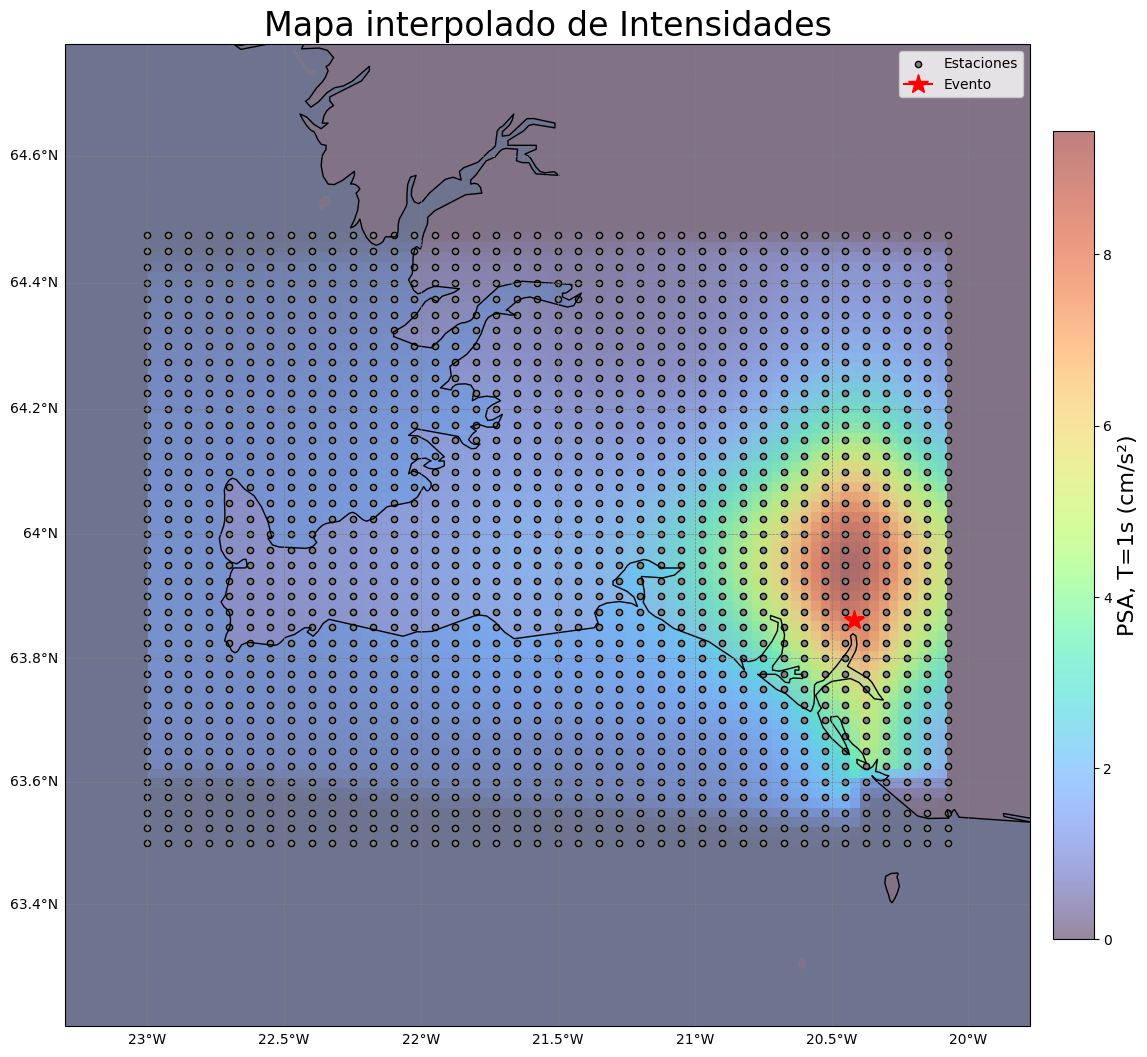

'\nimport matplotlib.pyplot as plt\nimport matplotlib.colors as mcolors\nimport cartopy.crs as ccrs\nimport cartopy.feature as cfeature\nimport numpy as np\n\n# Crear una copia del colormap \'turbo\'\ncmap = plt.cm.turbo\ncmap_array = cmap(np.linspace(0, 1, 256))  # Convertir a matriz RGBA\n\n# Hacer los colores más bajos completamente transparentes (e.g. los primeros 10)\ncmap_array[:1, -1] = 0  # Alfa = 0 → transparencia\n\n# Crear colormap nuevo con transparencia en valores bajos\ntransparent_cmap = mcolors.ListedColormap(cmap_array)\n\n# Graficar con Cartopy\nfig = plt.figure(figsize=(15, 15))\nax = plt.axes(projection=ccrs.Mercator())\nax.set_extent(region, crs=ccrs.PlateCarree())\n\nax.add_feature(cfeature.LAND, facecolor=\'lightgray\')\nax.add_feature(cfeature.OCEAN, facecolor=\'lightblue\')\nax.add_feature(cfeature.COASTLINE)\nax.add_feature(cfeature.BORDERS)\n\ngl = ax.gridlines(draw_labels=True, linewidth=0.5, color=\'gray\', linestyle=\'--\')\ngl.top_labels = gl.right_labels

In [ ]:
vecStations['Site_Lon'] = dfStations['Site_Lon'].values
vecStations['Site_Lat'] = dfStations['Site_Lat'].values

lat_true = df_event['Site_Lat'].values
lon_true = df_event['Site_Lon'].values
z_true = np.power(10, df_event['y_pred'].values)

LonMin = vecStations['Site_Lon'].min()
LonMax = vecStations['Site_Lon'].max()
LatMin = vecStations['Site_Lat'].min()
LatMax = vecStations['Site_Lat'].max()

llcrnrlon = LonMin - 0.3
urcrnrlon = LonMax + 0.3
llcrnrlat = LatMin - 0.3
urcrnrlat = LatMax + 0.3

region = [llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

size = 100
xi = np.linspace(llcrnrlon, urcrnrlon, size)
yi = np.linspace(llcrnrlat, urcrnrlat, size)
xgrid, ygrid = np.meshgrid(xi, yi)

points = np.column_stack((lon_true, lat_true))
grid_z = griddata(points, z_true, (xgrid, ygrid), method='linear', fill_value=0)

ds = xr.DataArray(grid_z, coords=[yi, xi], dims=["lat", "lon"])

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(region, crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = gl.right_labels = False

im = ax.pcolormesh(xi, yi, ds.values, cmap='turbo', transform=ccrs.PlateCarree(), shading='auto', alpha=0.50)

ax.scatter(vecStations['Site_Lon'], vecStations['Site_Lat'], 
           color='gray', edgecolor='black', s=20,
           transform=ccrs.PlateCarree(), label="Estaciones")

ax.plot(longitude_event, latitude_event, marker='*', markersize=15, 
        color='red', transform=ccrs.PlateCarree(), label='Evento')


cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label(f"PSA, T={period}s (cm/s²)", fontsize=16)

plt.title("Mapa interpolado de Intensidades", fontsize=24)
plt.legend()
plt.show()
